# Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [26]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [27]:
pd.options.display.max_colwidth = -1

from dsutils import *

# Data

In [28]:
data = pd.read_csv('data.csv')

# Vectorizisation

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(smooth_idf=True)
vector = vectorizer.fit_transform(data['Text'].astype(str))

y=data['Spam'].astype('int').values

In [31]:
print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (31730, 282252)
Y shape (31730,)


# Machine Learning

In [32]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB

Mean Loss 0.6916482823826032 +- 0.004738300252039787


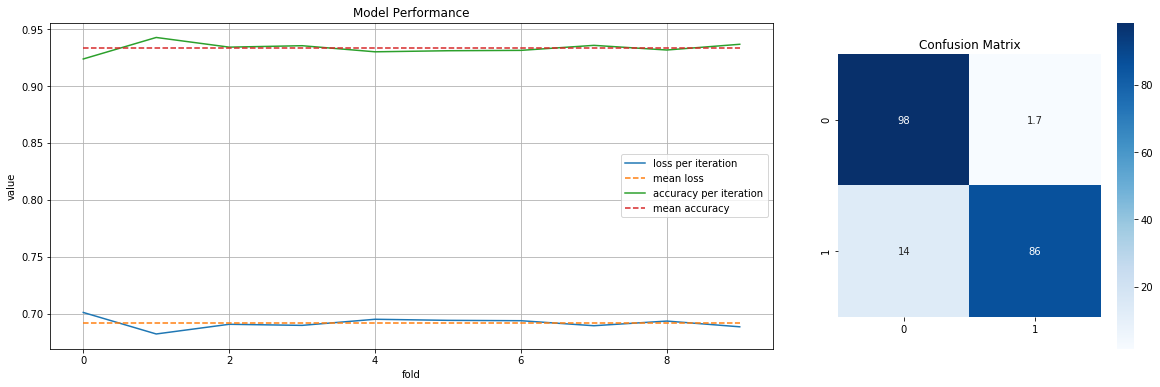

In [33]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB

Mean Loss 0.7589032461393004 +- 0.00308791647372602


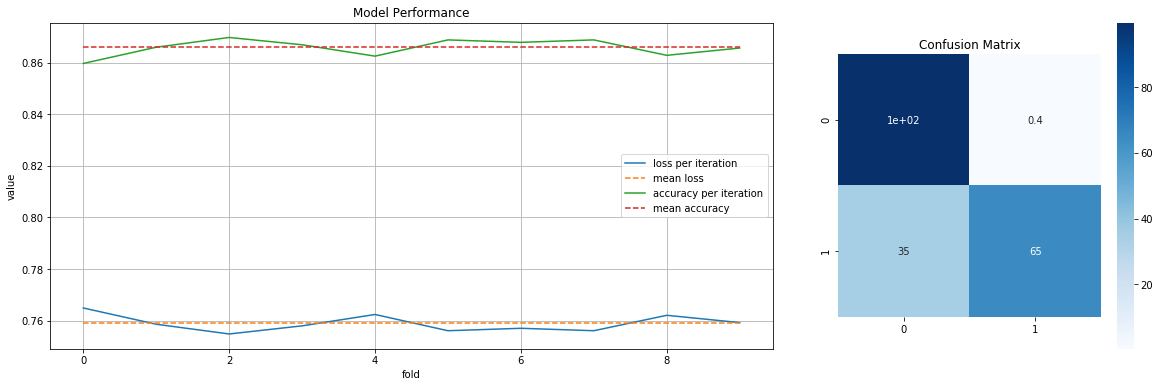

In [34]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression

Mean Loss 0.6601953986763316 +- 0.0038257777259359522


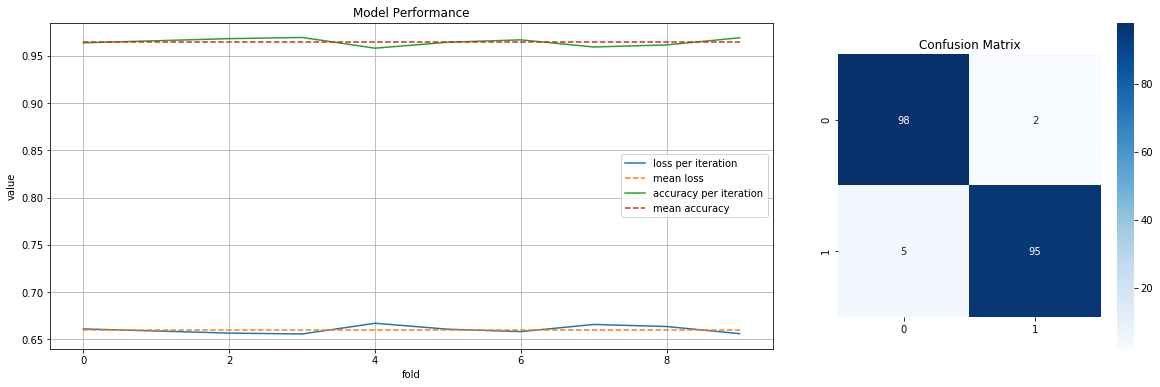

In [35]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, class_weight='balanced', random_state=101, 
                           warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))

Mean Loss 0.6543334383863851 +- 0.002582767254780692


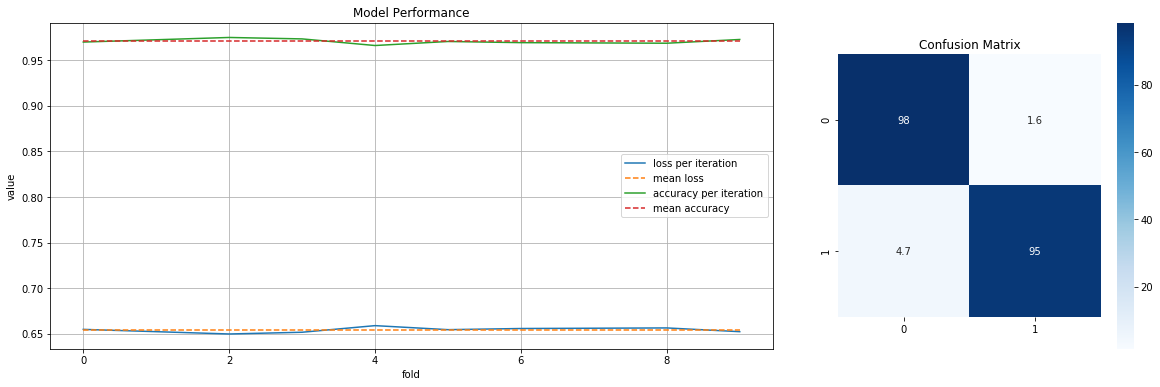

In [36]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss

Mean Loss 0.6748187834856603 +- 0.00309048866615348


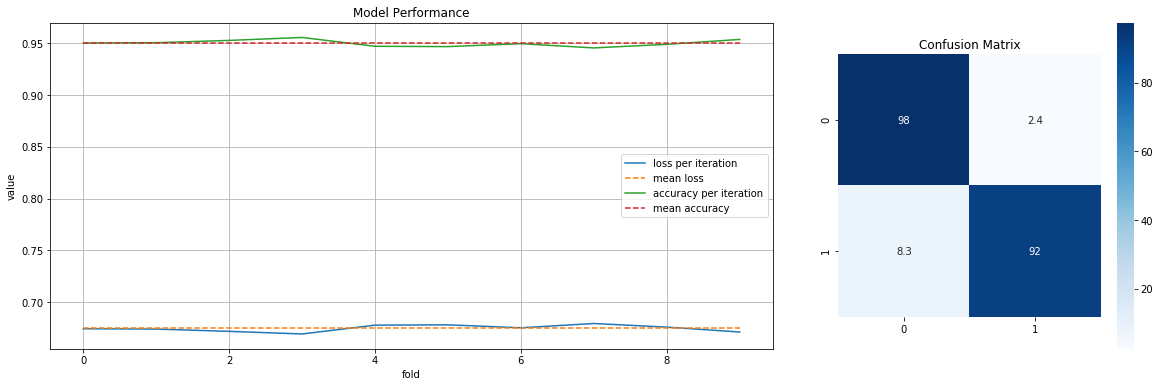

In [37]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True,
                      class_weight='balanced')
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))

Mean Loss 0.6609832965647651 +- 0.0020812438677717013


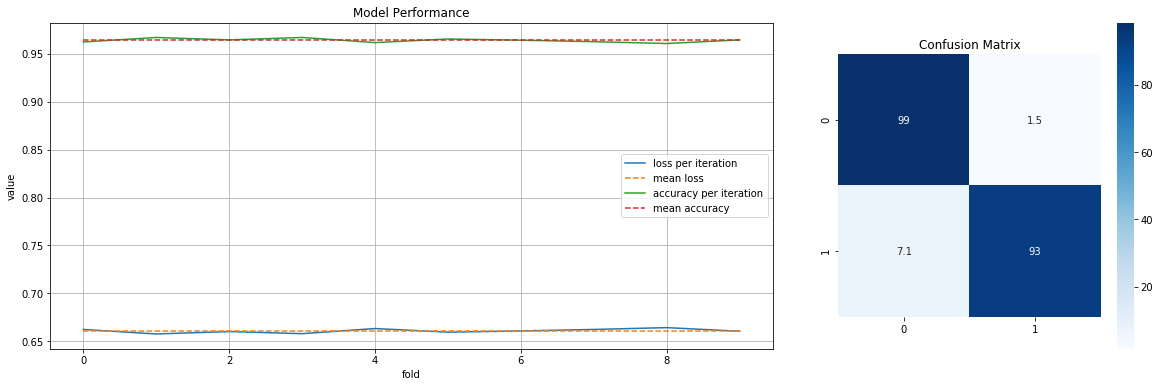

In [38]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss

Mean Loss 0.6661834226284273 +- 0.004180583523174387


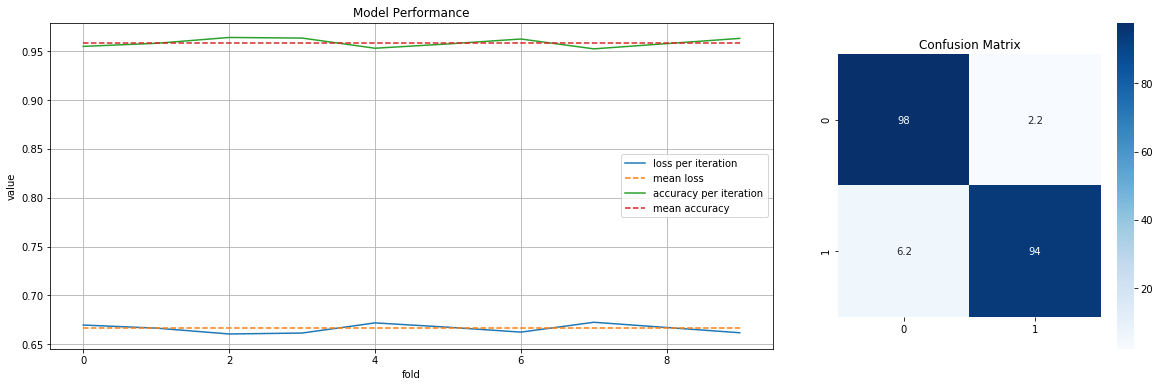

In [39]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))

Mean Loss 0.6503624330286795 +- 0.00253384824988866


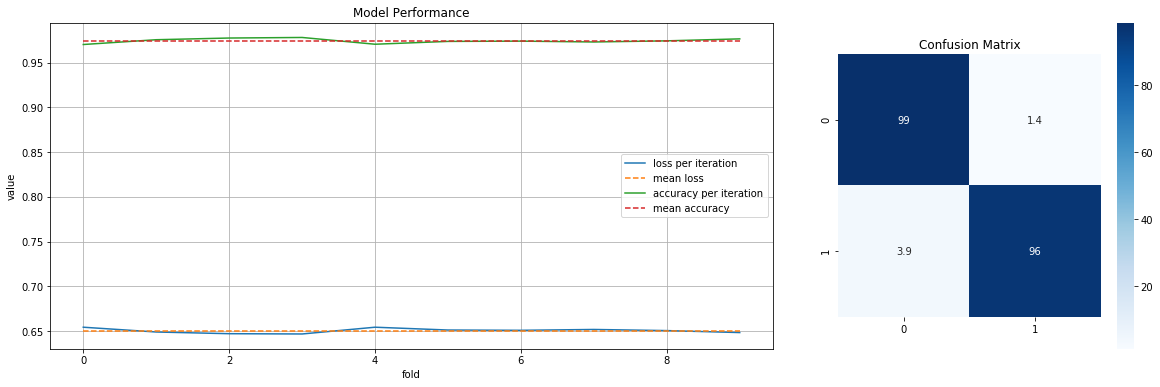

In [40]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss

Mean Loss 0.8180271036873622 +- 0.10416534065728528


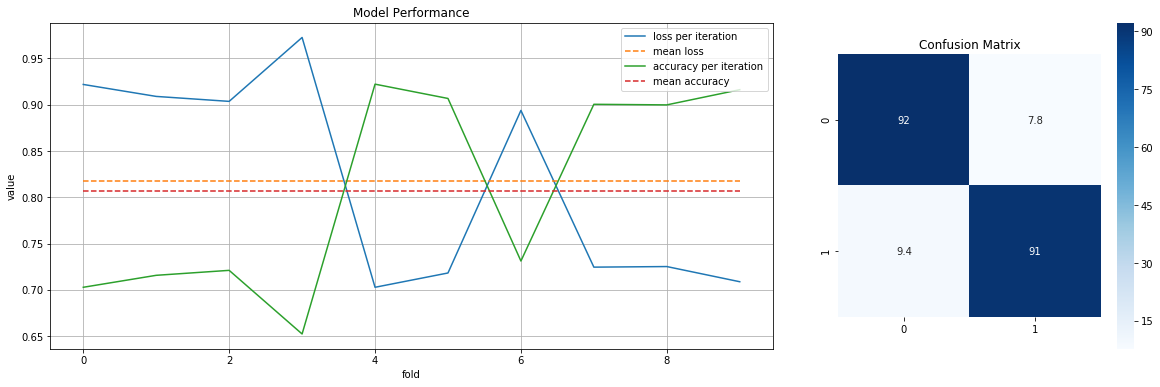

In [41]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))

Mean Loss 0.6540497951465489 +- 0.0024373440026455038


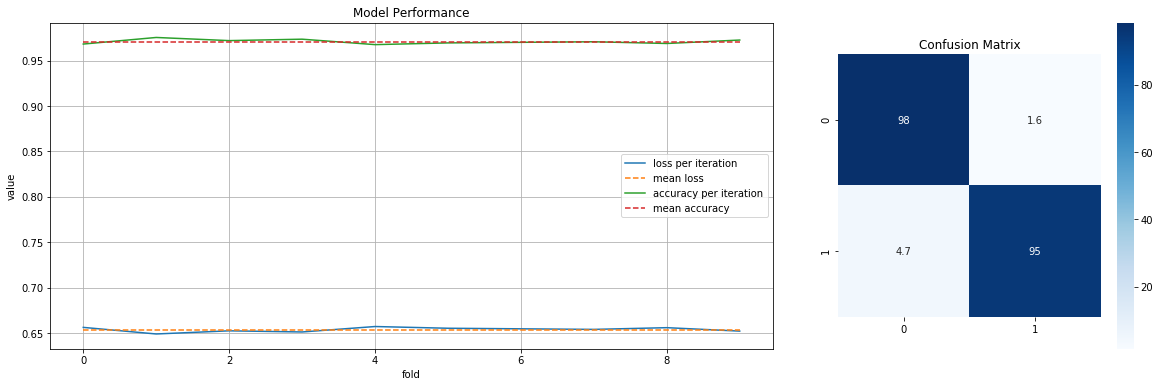

In [42]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree

Mean Loss 0.6763630633469904 +- 0.003652176560071865


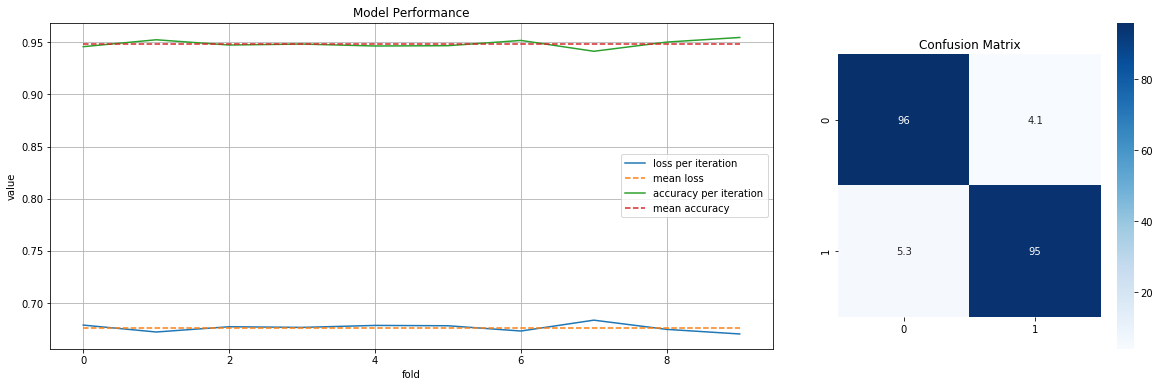

In [43]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [44]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [45]:
performance

,FP,FN
MultinomialNB,1.664145,14.117647
BernoulliNB,0.403429,35.126050
LogisticRegression1,1.966717,4.957983
LogisticRegression2,1.563288,4.705882
SGDClassifierL1,2.420575,8.319328
SGDClassifierL2,1.462431,7.058824
SGDClassifierH1,2.168432,6.218487
SGDClassifierH2,1.412002,3.865546
SGDClassifierP1,7.766011,9.411765
SGDClassifierP2,1.563288,4.705882


Mean Loss 0.6534509927513394 +- 0.0030756691834241045


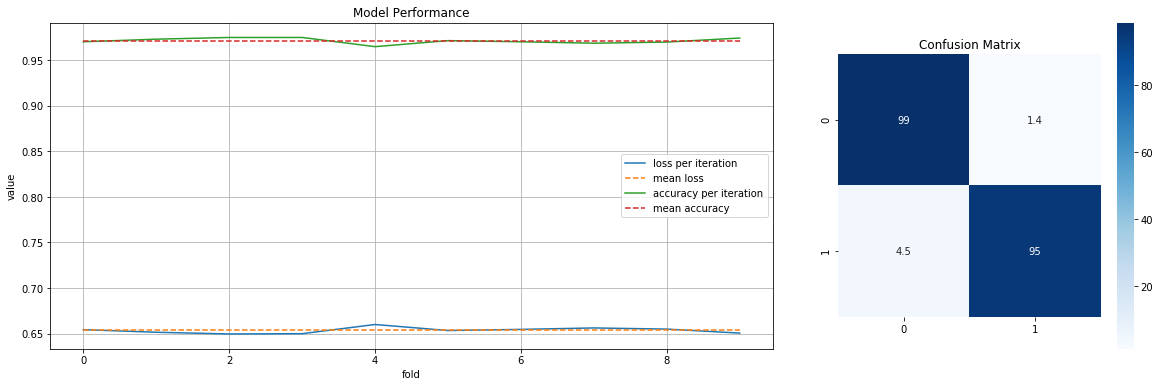

In [46]:
model = VotingClassifier(estimators=[
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P1', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('DT', DecisionTreeClassifier(class_weight='balanced', random_state=101))
], weights=[1.3, 1.3, 0.8, 1, 1, 1.4, 0.2, 1.3, 0.9])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [47]:
pickle.dump(vectorizer, open('Vectorizer-spam-1.pkl', 'wb'))

In [48]:
pickle.dump(v_model, open('SpamClassifier-1.pkl', 'wb'))